<a href="https://colab.research.google.com/github/Buntariga2545/Project/blob/main/Association_Rules_%E0%B9%81%E0%B8%81%E0%B9%89%E0%B8%A5%E0%B9%88%E0%B8%B2%E0%B8%AA%E0%B8%B8%E0%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [2]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_excel('/content/Data-Survey-13-7-2023_1.xlsx', skiprows = 1)
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,2,3,2,0,-1,0,-1,0
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,5,3,1,0,0,1,-1,0
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,4,1,1,0,0,0,0,0
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,3,4,4,2,-1,0,0,-1,1
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,4,3,0,-1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,4,3,2,-1,1,0,-1,-1
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,1,4,3,4,-1,1,1,-1,-1
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,4,4,4,5,3,-1,-1,1,-1,-1
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,1,5,0,3,-1,1,1,-1,-1


In [7]:
data.rename(columns = {'Unnamed: 0' : 'No', 'Unnamed: 1' : 'Date', 'Unnamed: 2' : 'เพศ', 'Unnamed: 3' : 'Age', 'Unnamed: 4' : 'Weight',
                       'Unnamed: 5' : 'Height', 'Unnamed: 6' : 'BMI', 'Unnamed: 7' : 'พื้นที่ทำแบบสอบถาม', 'Unnamed: 8' : 'เวลา',
                       '%RH' : 'RH','V (m/s)' : 'V','Unnamed: 18' : 'Thermal_acceptance', 'Unnamed: 26' : 'Thermal_sensation_Vote'
                       }, inplace = True)
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,2,3,2,0,-1,0,-1,0
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,5,3,1,0,0,1,-1,0
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,4,1,1,0,0,0,0,0
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,3,4,4,2,-1,0,0,-1,1
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,4,3,0,-1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,4,3,2,-1,1,0,-1,-1
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,1,4,3,4,-1,1,1,-1,-1
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,4,4,4,5,3,-1,-1,1,-1,-1
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,1,5,0,3,-1,1,1,-1,-1


In [ ]:
data.describe()

,No,Age,Weight,Height,BMI,Temp,Globe temp,RH,V,วงเล็บ 1,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
count,193.000000,193.000000,191.000000,191.000000,191.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,30.720207,68.544503,167.335079,24.364324,30.895337,31.533161,48.780829,0.265311,8.621030e+09,...,2.559585,1.989637,2.414508,2.207254,2.129534,-0.647668,-0.103627,0.637306,-0.419689,-0.450777
std,55.858452,11.950177,22.407397,9.767442,7.126414,2.310264,2.432899,7.491418,0.285395,2.756796e+08,...,1.667028,1.454124,1.404679,2.010014,1.941544,0.510522,0.558679,0.543002,0.554363,0.558002
min,1.000000,20.000000,41.000000,144.000000,16.015625,27.200000,27.600000,38.100000,0.045000,8.181304e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,25.000000,49.000000,158.500000,19.146722,29.100000,29.800000,42.500000,0.120000,8.423330e+09,...,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000
50%,97.000000,27.000000,63.000000,169.000000,22.230987,30.800000,31.800000,46.600000,0.185000,8.647977e+09,...,2.000000,2.000000,2.000000,2.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000
75%,145.000000,36.000000,76.500000,173.500000,27.548209,32.700000,33.100000,56.100000,0.330000,8.796388e+09,...,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,193.000000,70.000000,147.000000,187.000000,48.553310,35.600000,36.200000,64.200000,1.765000,9.157997e+09,...,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Data Cleaning

จัดการกับค่าว่างด้วย KNN

In [8]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(data[['Weight', 'Height']])
imputed[163:168]


array([[ 78.        , 185.        ],
       [ 65.        , 169.        ],
       [ 68.54450262, 167.33507853],
       [ 64.        , 154.        ],
       [ 65.        , 150.        ]])

In [9]:
imputed[123:130]

array([[ 49.        , 169.        ],
       [ 46.        , 155.        ],
       [ 63.        , 173.        ],
       [ 89.        , 153.        ],
       [ 68.54450262, 167.33507853],
       [ 62.        , 163.        ],
       [ 60.        , 155.        ]])

In [10]:
data.Weight.fillna(68, inplace=True)
data.Height.fillna(167, inplace=True)

In [11]:
BMI1 = 68/(1.67**2)
BMI1

24.38237297859371

In [12]:
data.BMI.fillna(BMI1, inplace=True)

In [13]:
data[125:130]

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
125,126,2023-01-06 00:00:00,ชาย,20,63.0,173.0,21.049818,ภายนอก / ใต้ร่มไม้,15:44 PM,30.2,...,2,4,0,0,4,-1,-1,1,0,0
126,127,2023-01-06 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก / ใต้ร่มไม้,15:44 PM,30.2,...,1,0,1,1,2,0,0,1,0,-1
127,128,13/05/2023,ชาย,57,68.0,167.0,24.382373,ภายใต้อาคาร,11.50 AM,32.7,...,3,4,2,3,3,-1,0,1,0,-1
128,129,13/05/2023,ชาย,56,62.0,163.0,23.335466,ภายใต้อาคาร,11.50 AM,32.7,...,2,3,2,2,0,-1,0,1,-1,0
129,130,13/05/2023,หญิง,60,60.0,155.0,24.973985,ภายใต้อาคาร,11.58 AM,32.2,...,6,3,1,6,5,-1,-1,1,-1,-1


##ดูค่า Outlier

In [ ]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7810f0b9c430>,
 'caps': [<matplotlib.lines.Line2D at 0x7810f0b9ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7810f0b9c130>],
 'medians': [<matplotlib.lines.Line2D at 0x7810f0b9d960>],
 'fliers': [<matplotlib.lines.Line2D at 0x7810f0b9d660>],
 'means': []}

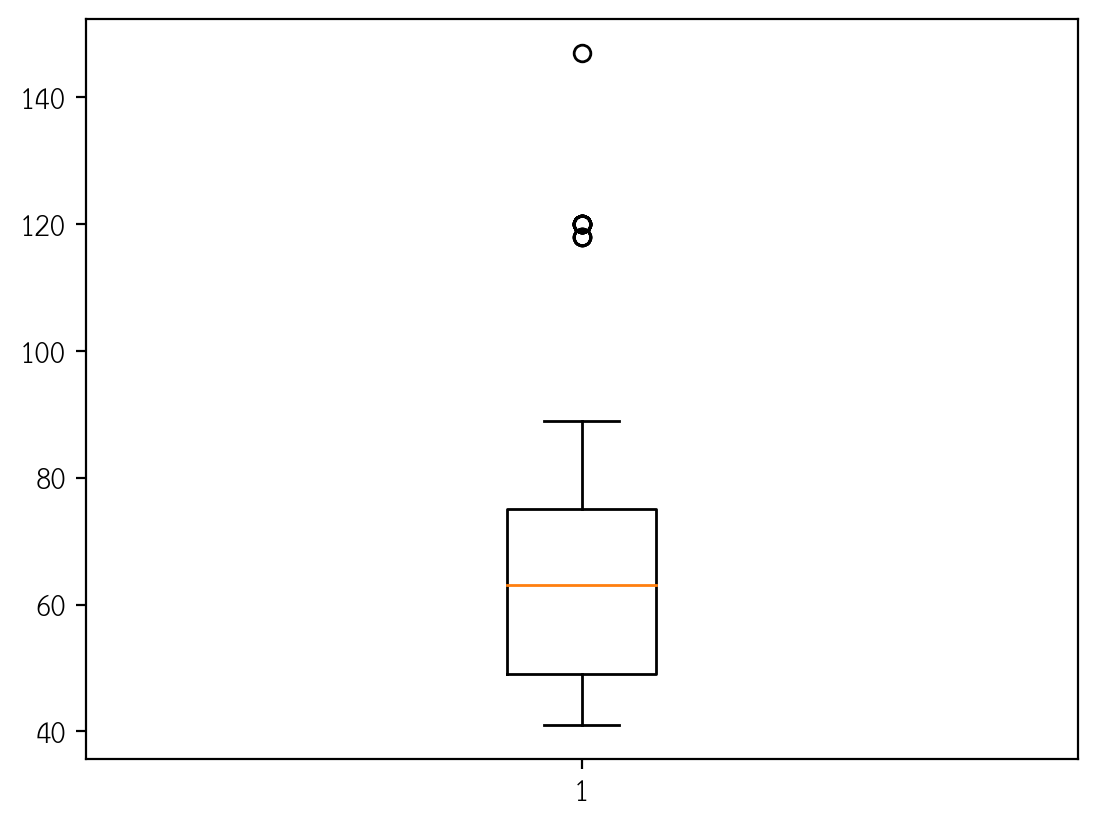

In [ ]:
plt.boxplot(data['Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7810eead41c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7810eead4700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7810eeaa7ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7810eead4c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7810eead4ee0>],
 'means': []}

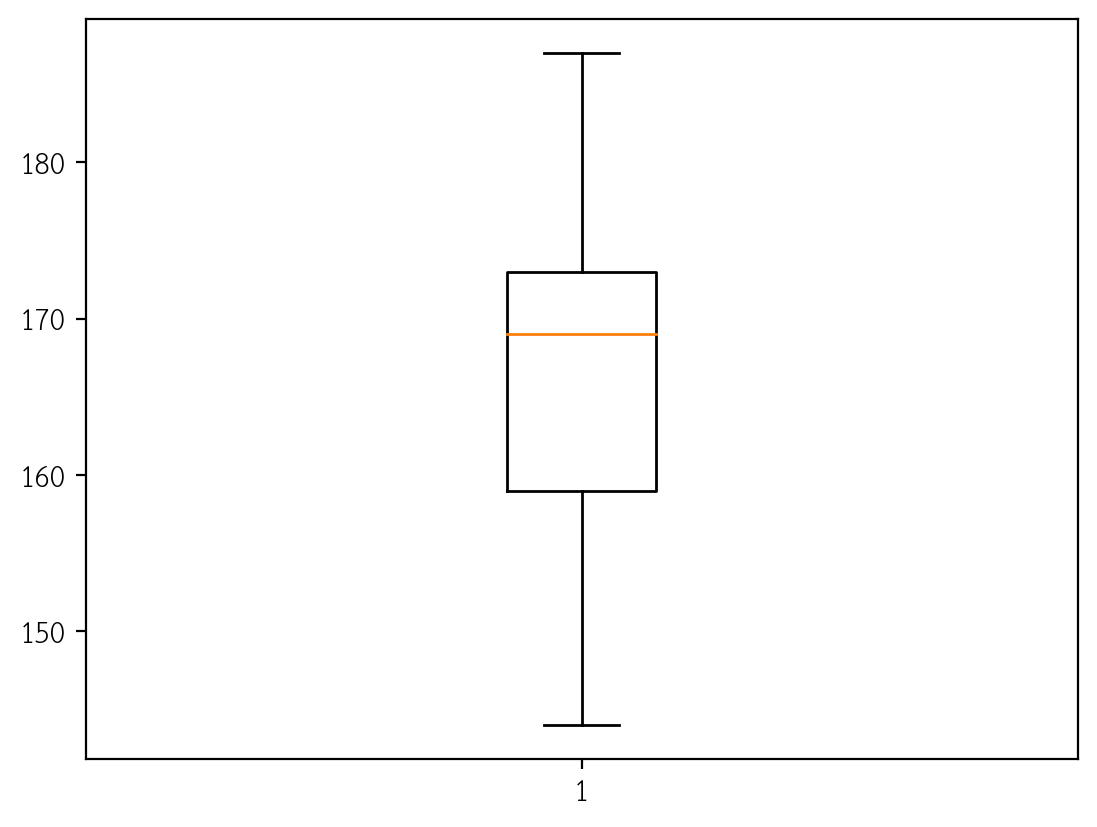

In [ ]:
plt.boxplot(data['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7810eeb2dcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7810eeb2e200>,
 'boxes': [<matplotlib.lines.Line2D at 0x7810eeb2da20>],
 'medians': [<matplotlib.lines.Line2D at 0x7810eeb2e740>],
 'fliers': [<matplotlib.lines.Line2D at 0x7810eeb2e9e0>],
 'means': []}

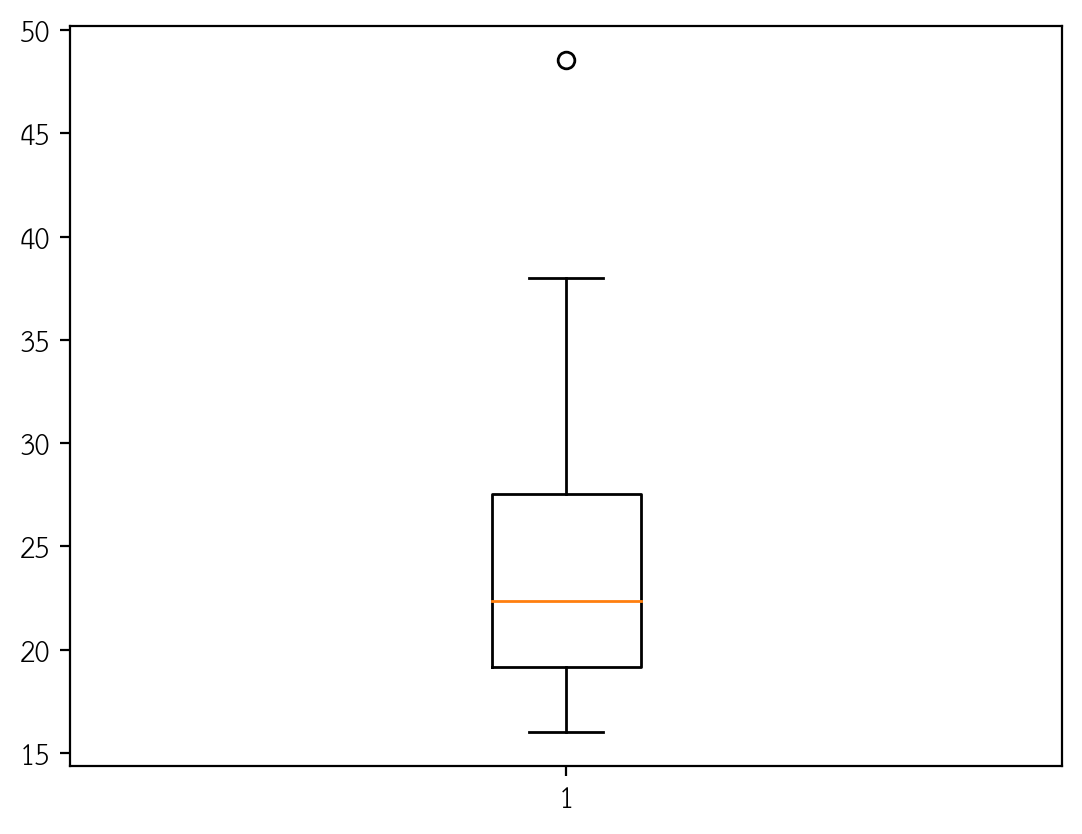

In [ ]:
plt.boxplot(data['BMI'])

#เพิ่มคอลัมน์ค่า TMRT clo และ met ตามลำดับ

In [14]:
data["TMRT"] = data['ยกกำลัง 1 ส่วน 4/ 0.25'] - data['ลบ 273.15']
data["Clo"] = 0.55
data["Met"] =  1.2
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,2,0,-1,0,-1,0,30.628551,0.55,1.2
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,1,0,0,1,-1,0,30.628551,0.55,1.2
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,1,0,0,0,0,0,30.628551,0.55,1.2
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,4,2,-1,0,0,-1,1,30.628551,0.55,1.2
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,-1,-1,0,-1,0,30.628551,0.55,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,-1,1,0,-1,-1,36.559615,0.55,1.2
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,4,-1,1,1,-1,-1,36.559615,0.55,1.2
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,5,3,-1,-1,1,-1,-1,36.559615,0.55,1.2
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,0,3,-1,1,1,-1,-1,36.559615,0.55,1.2


##drop คอลัมน์ -3 ถึง 3 และคอลัมน์สูตรในการคำนวณหา TMRT ออก

In [15]:
data.drop([-3, -2, -1, 0, '+1', '+2', '+3'], axis=1, inplace=True)

In [16]:
data.drop(['วงเล็บ 1', 'สมการหลัง บวก', 'วงเล็บ 2','ยกกำลัง 1 ส่วน 4/ 0.25', 'ลบ 273.15'  ], axis=1, inplace=True)

##แทนค่าลักษณะของคำที่เหมือนกัน

In [17]:
set(data['พื้นที่ทำแบบสอบถาม'])

{'ภายนอก / ใต้ร่มไม้',
 'ภายนอก กลางแจ้ง',
 'ภายนอก/ กลางแจ้ง',
 'ภายนอก/ มีหลังคาคลุม',
 'ภายใต้ร่มไม้',
 'ภายใต้อาคาร'}

In [18]:
data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายใต้ร่มไม้'] = 'ภายนอก / ใต้ร่มไม้'
data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายนอก กลางแจ้ง'] = 'ภายนอก/ กลางแจ้ง'

<ipython-input-18-daf20139a280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายใต้ร่มไม้'] = 'ภายนอก / ใต้ร่มไม้'
<ipython-input-18-daf20139a280>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายนอก กลางแจ้ง'] = 'ภายนอก/ กลางแจ้ง'


In [19]:
set(data['พื้นที่ทำแบบสอบถาม'])

{'ภายนอก / ใต้ร่มไม้',
 'ภายนอก/ กลางแจ้ง',
 'ภายนอก/ มีหลังคาคลุม',
 'ภายใต้อาคาร'}

##เปลี่ยนวันที่เป็น datetime

In [20]:
set(data['Date'])

{'13/05/2023',
 datetime.datetime(2022, 12, 28, 0, 0),
 datetime.datetime(2023, 1, 6, 0, 0),
 datetime.datetime(2023, 1, 8, 0, 0)}

In [21]:
data['Date'] = pd.to_datetime(data.Date)

<ipython-input-21-2e81f6b9fef3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data.Date)


In [22]:
set(data['Date'])

{Timestamp('2022-12-28 00:00:00'),
 Timestamp('2023-01-06 00:00:00'),
 Timestamp('2023-01-08 00:00:00'),
 Timestamp('2023-05-13 00:00:00')}

In [23]:
data['Date'] = pd.to_datetime(data.Date)

In [24]:
conditions = [
    data.Date.dt.month.isin(np.arange(5,10)),
    (data.Date.dt.month.isin(np.arange(1,5))) | (data.Date.dt.month.isin(np.arange(10,13))),
]
choices = ['summer','winter']
data['seasons'] = np.select(conditions, choices)
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,1,2022-12-28,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,winter
1,2,2022-12-28,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,0,0,1,-1,0,30.628551,0.55,1.2,winter
2,3,2022-12-28,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,0,0,0,0,0,30.628551,0.55,1.2,winter
3,4,2022-12-28,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,winter
4,5,2022-12-28,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,2023-05-13,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,summer
189,190,2023-05-13,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,summer
190,191,2023-05-13,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,summer
191,192,2023-05-13,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,summer




#histogram
##ของตัวแปร อายุ น้ำหนัก ส่วนสูง ค่า bmi อุณหภูมิ ความชื้นสัมพัทธ์ ความเร็วลม และTMRT

In [77]:
col = ['Age', 'BMI', 'Temp', 'RH', 'V', 'TMRT']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


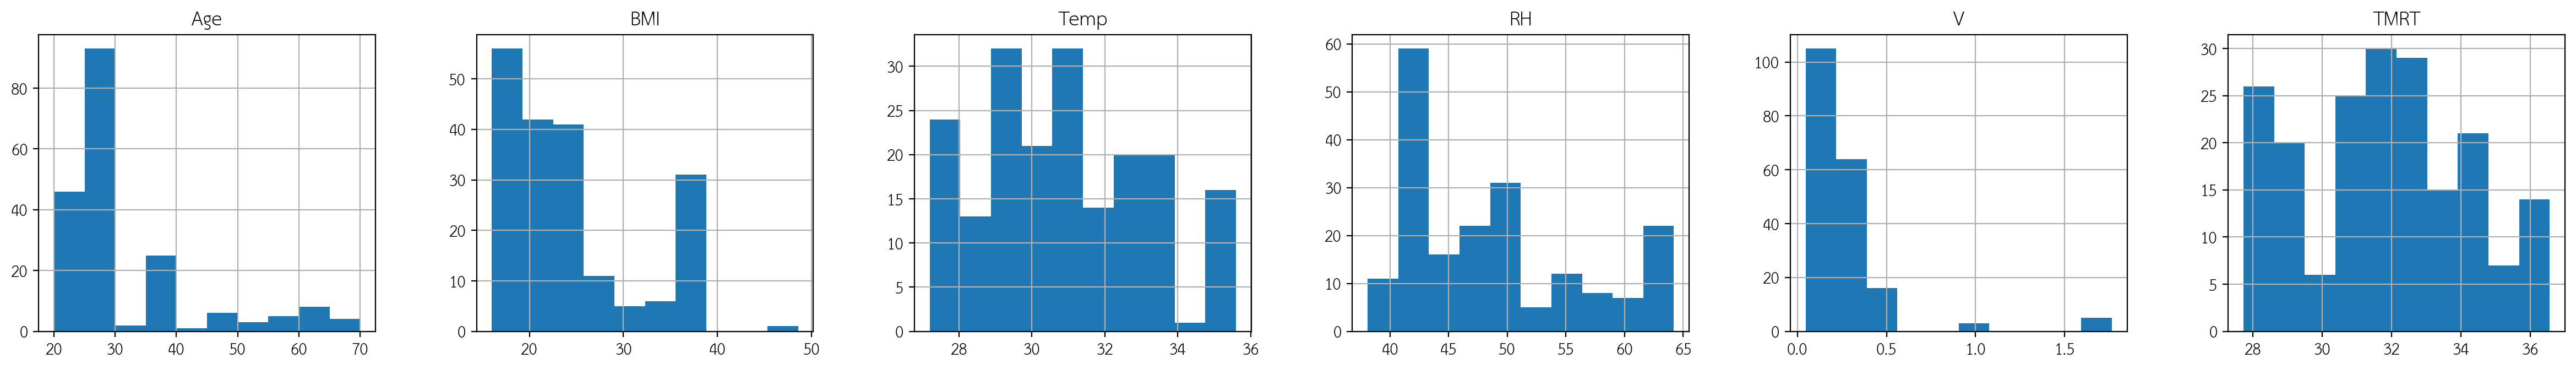

In [78]:
data[col].hist(layout=(1, len(cols)), figsize=(5 * len(cols), 3.5));

#แบ่งกลุ่มข้อมูล

In [83]:
def convert_to_buckets(Age):
    if Age < 39:
          return 'วัยหนุ่มสาว'
    elif Age < 59:
          return 'วัยกลางคน'
    else:
        return 'วัยชรา'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
data['age_cat']=data['Age'].map(convert_to_buckets)
data['age_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


วัยหนุ่มสาว    166
วัยกลางคน       14
วัยชรา          13
Name: age_cat, dtype: int64

In [81]:
def convert_to_buckets(V):
    if V < 0.29:
          return 'ลมสงบ'
    elif V < 1.6:
          return 'ลมเบา'
    else:
        return 'ลมอ่อน'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
data['v_cat']=data['V'].map(convert_to_buckets)
data['v_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ลมสงบ     132
ลมเบา      56
ลมอ่อน      5
Name: v_cat, dtype: int64

In [29]:
def convert_to_buckets(RH):
    if RH < 40:
          return 'แห้งเกินไป'
    elif RH < 60:
          return 'ความชื้นเหมาะสม'
    else:
        return 'ชื้นเกินไป'

In [30]:
data['rh_cat']=data['RH'].map(convert_to_buckets)
data['rh_cat'].value_counts()

ความชื้นเหมาะสม    163
ชื้นเกินไป          22
แห้งเกินไป           8
Name: rh_cat, dtype: int64

In [31]:
def convert_to_buckets(BMI):
    if BMI < 18.5:
          return 'น้ำหนักต่ำกว่าเกณฑ์'
    elif BMI < 22.9:
          return 'สมส่วน'
    elif BMI < 24.9:
          return 'น้ำหนักเกิน'
    elif BMI < 29.9:
          return 'โรคอ้วนระดับที่ 1'
    else:
        return 'โรคอ้วนระดับที่ 2'

In [32]:
data['bmi_cat']= data['BMI'].map(convert_to_buckets)
data['bmi_cat'].value_counts()

สมส่วน                 63
โรคอ้วนระดับที่ 2      40
น้ำหนักต่ำกว่าเกณฑ์    39
น้ำหนักเกิน            36
โรคอ้วนระดับที่ 1      15
Name: bmi_cat, dtype: int64

In [33]:
def convert_to_buckets(Temp):
    if Temp < 28.9 :
          return 'อากาศค่อนข้างเย็น'
    elif Temp < 34.9 :
          return 'อากาศค่อนข้างร้อน'
    else:
        return  'อากาศร้อน'

In [34]:
data['temp_cat']=data['Temp'].map(convert_to_buckets)
data['temp_cat'].value_counts()

อากาศค่อนข้างร้อน    140
อากาศค่อนข้างเย็น     37
อากาศร้อน             16
Name: temp_cat, dtype: int64

#Association Rules

In [35]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=f5817d4be4e313b7d75b8c6d595888b2917aa4822469f0ee93af8fb1b2f018bb
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [36]:
!pip install mlxtend

In [37]:
from mlxtend.frequent_patterns import apriori, association_rules
import apyori

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No                      193 non-null    int64         
 1   Date                    193 non-null    datetime64[ns]
 2   เพศ                     193 non-null    object        
 3   Age                     193 non-null    int64         
 4   Weight                  193 non-null    float64       
 5   Height                  193 non-null    float64       
 6   BMI                     193 non-null    float64       
 7   พื้นที่ทำแบบสอบถาม      193 non-null    object        
 8   เวลา                    193 non-null    object        
 9   Temp                    193 non-null    float64       
 10  Globe temp              193 non-null    float64       
 11  RH                      193 non-null    float64       
 12  V                       193 non-null    float64   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Thermal acceptance

In [85]:
cols = ['age_cat', 'bmi_cat', 'temp_cat','rh_cat','v_cat',  'พื้นที่ทำแบบสอบถาม','seasons','เพศ','Thermal_acceptance']
in_df = data[cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
in_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_cat,bmi_cat,temp_cat,rh_cat,v_cat,พื้นที่ทำแบบสอบถาม,seasons,เพศ,Thermal_acceptance
0,วัยหนุ่มสาว,น้ำหนักต่ำกว่าเกณฑ์,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept
1,วัยหนุ่มสาว,น้ำหนักเกิน,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept
2,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,หญิง,Accept
3,วัยหนุ่มสาว,โรคอ้วนระดับที่ 1,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept
4,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept


In [87]:
dataset = []
for i in range(0, in_df.shape[0]-1):
    dataset.append([str(in_df.values[i,j]) for j in range(0, in_df.shape[1])])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
from mlxtend.preprocessing import TransactionEncoder
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Accept,Unaccept,summer,winter,ความชื้นเหมาะสม,ชาย,ชื้นเกินไป,น้ำหนักต่ำกว่าเกณฑ์,น้ำหนักเกิน,ภายนอก / ใต้ร่มไม้,...,วัยชรา,วัยหนุ่มสาว,สมส่วน,หญิง,อากาศค่อนข้างร้อน,อากาศค่อนข้างเย็น,อากาศร้อน,แห้งเกินไป,โรคอ้วนระดับที่ 1,โรคอ้วนระดับที่ 2
0,True,False,False,True,True,True,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False
1,True,False,False,True,True,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
2,True,False,False,True,True,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,True
3,True,False,False,True,True,True,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
4,True,False,False,True,True,True,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True


In [89]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first.sort_values("Support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
Accept,0.890625
วัยหนุ่มสาว,0.864583
ความชื้นเหมาะสม,0.843750
อากาศค่อนข้างร้อน,0.729167
ลมสงบ,0.687500
winter,0.661458
ชาย,0.651042
ภายนอก/ มีหลังคาคลุม,0.557292
หญิง,0.348958
summer,0.338542


##mini sup

In [90]:
output1 = apriori(df, min_support=0.1, use_colnames=oht.columns_)
output1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.109375,(Unaccept)
2,0.338542,(summer)
3,0.661458,(winter)
4,0.843750,(ความชื้นเหมาะสม)
...,...,...
954,0.104167,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, Acce..."
955,0.239583,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, Acce..."
956,0.203125,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, Acce..."
957,0.213542,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ชาย,..."


In [91]:
output2 = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.338542,(summer)
2,0.661458,(winter)
3,0.843750,(ความชื้นเหมาะสม)
4,0.651042,(ชาย)
...,...,...
300,0.270833,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, Acce..."
301,0.239583,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, Acce..."
302,0.203125,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, Acce..."
303,0.213542,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ชาย,..."


In [92]:
output3 = apriori(df, min_support=0.3, use_colnames=True)
output3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.338542,(summer)
2,0.661458,(winter)
3,0.843750,(ความชื้นเหมาะสม)
4,0.651042,(ชาย)
...,...,...
201,0.333333,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, Acce..."
202,0.328125,"(อากาศค่อนข้างร้อน, Accept, ความชื้นเหมาะสม, ว..."
203,0.302083,"(ภายนอก/ มีหลังคาคลุม, Accept, ชาย, วัยหนุ่มสา..."
204,0.302083,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, Acce..."


In [93]:
output4 = apriori(df, min_support=0.4, use_colnames=True)
output4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.661458,(winter)
2,0.843750,(ความชื้นเหมาะสม)
3,0.651042,(ชาย)
4,0.557292,(ภายนอก/ มีหลังคาคลุม)
...,...,...
107,0.447917,"(Accept, ความชื้นเหมาะสม, วัยหนุ่มสาว, ลมสงบ, ..."
108,0.406250,"(อากาศค่อนข้างร้อน, Accept, ความชื้นเหมาะสม, ว..."
109,0.427083,"(ภายนอก/ มีหลังคาคลุม, Accept, ชาย, วัยหนุ่มสา..."
110,0.406250,"(ภายนอก/ มีหลังคาคลุม, Accept, วัยหนุ่มสาว, ลม..."


In [94]:
output5 = apriori(df, min_support=0.5, use_colnames=True)
output5.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
6,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
23,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
13,0.776042,"(วัยหนุ่มสาว, Accept)"
9,0.750000,"(ความชื้นเหมาะสม, Accept)"
7,0.729167,(อากาศค่อนข้างร้อน)
36,0.703125,"(วัยหนุ่มสาว, ความชื้นเหมาะสม, Accept)"
5,0.687500,(ลมสงบ)
14,0.661458,"(อากาศค่อนข้างร้อน, Accept)"


In [95]:
output6 = apriori(df, min_support=0.6, use_colnames=True)
output6.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
5,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
15,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
11,0.776042,"(วัยหนุ่มสาว, Accept)"
8,0.750000,"(ความชื้นเหมาะสม, Accept)"
6,0.729167,(อากาศค่อนข้างร้อน)
20,0.703125,"(วัยหนุ่มสาว, ความชื้นเหมาะสม, Accept)"
4,0.687500,(ลมสงบ)
1,0.661458,(winter)


In [96]:
output7 = apriori(df, min_support=0.7, use_colnames=True)
output7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.843750,(ความชื้นเหมาะสม)
2,0.864583,(วัยหนุ่มสาว)
3,0.729167,(อากาศค่อนข้างร้อน)
4,0.750000,"(ความชื้นเหมาะสม, Accept)"
5,0.776042,"(วัยหนุ่มสาว, Accept)"
6,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
7,0.703125,"(วัยหนุ่มสาว, ความชื้นเหมาะสม, Accept)"


In [97]:
output8 = apriori(df, min_support=0.8, use_colnames=oht.columns_)
output8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.843750,(ความชื้นเหมาะสม)
2,0.864583,(วัยหนุ่มสาว)


## mini conf

In [99]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf1 = association_rules(output1, metric = "confidence", min_threshold = 0.1)
frequent_conf1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(summer),(Accept),0.338542,0.890625,0.250000,0.738462,0.829150,-0.051514,0.418199,-0.237523
1,(Accept),(summer),0.890625,0.338542,0.250000,0.280702,0.829150,-0.051514,0.919588,-0.653251
2,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
3,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
4,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
...,...,...,...,...,...,...,...,...,...,...
18903,(Accept),"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ลมสง...",0.890625,0.213542,0.203125,0.228070,1.068036,0.012939,1.018821,0.582418
18904,(ชาย),"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ลมสง...",0.651042,0.270833,0.203125,0.312000,1.152000,0.026801,1.059835,0.378109
18905,(ความชื้นเหมาะสม),"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ลมสง...",0.843750,0.239583,0.203125,0.240741,1.004831,0.000977,1.001524,0.030769
18906,(วัยหนุ่มสาว),"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ลมสง...",0.864583,0.203125,0.203125,0.234940,1.156627,0.027507,1.041585,1.000000


In [100]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf2 = association_rules(output2, metric = "confidence", min_threshold = 0.2)
frequent_conf2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(summer),(Accept),0.338542,0.890625,0.250000,0.738462,0.829150,-0.051514,0.418199,-0.237523
1,(Accept),(summer),0.890625,0.338542,0.250000,0.280702,0.829150,-0.051514,0.919588,-0.653251
2,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
3,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
4,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
...,...,...,...,...,...,...,...,...,...,...
6227,(Accept),"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ลมสง...",0.890625,0.213542,0.203125,0.228070,1.068036,0.012939,1.018821,0.582418
6228,(ชาย),"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ลมสง...",0.651042,0.270833,0.203125,0.312000,1.152000,0.026801,1.059835,0.378109
6229,(ความชื้นเหมาะสม),"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ลมสง...",0.843750,0.239583,0.203125,0.240741,1.004831,0.000977,1.001524,0.030769
6230,(วัยหนุ่มสาว),"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ลมสง...",0.864583,0.203125,0.203125,0.234940,1.156627,0.027507,1.041585,1.000000


In [101]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf3 = association_rules(output3, metric = "confidence", min_threshold = 0.3)
frequent_conf3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
1,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
2,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
3,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
4,(ชาย),(Accept),0.651042,0.890625,0.604167,0.928000,1.041965,0.024333,1.519097,0.115414
...,...,...,...,...,...,...,...,...,...,...
2981,(อากาศค่อนข้างร้อน),"(ภายนอก/ มีหลังคาคลุม, Accept, วัยหนุ่มสาว, ลม...",0.729167,0.406250,0.312500,0.428571,1.054945,0.016276,1.039062,0.192308
2982,(Accept),"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, วัยห...",0.890625,0.328125,0.312500,0.350877,1.069340,0.020264,1.035051,0.592857
2983,(วัยหนุ่มสาว),"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, Acce...",0.864583,0.312500,0.312500,0.361446,1.156627,0.042318,1.076651,1.000000
2984,(ลมสงบ),"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, Acce...",0.687500,0.375000,0.312500,0.454545,1.212121,0.054688,1.145833,0.560000


In [102]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf4 = association_rules(output4, metric = "confidence", min_threshold = 0.4)
frequent_conf4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
1,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
2,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
3,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
4,(ชาย),(Accept),0.651042,0.890625,0.604167,0.928000,1.041965,0.024333,1.519097,0.115414
...,...,...,...,...,...,...,...,...,...,...
903,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, ความชื้นเหมาะสม, winter, ชาย)",0.557292,0.473958,0.401042,0.719626,1.518332,0.136909,1.876215,0.771123
904,(ชาย),"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, winter, คว...",0.651042,0.515625,0.401042,0.616000,1.194667,0.065348,1.261393,0.466951
905,(ความชื้นเหมาะสม),"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, winter, ชาย)",0.843750,0.437500,0.401042,0.475309,1.086420,0.031901,1.072059,0.509091
906,(วัยหนุ่มสาว),"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม, winter...",0.864583,0.401042,0.401042,0.463855,1.156627,0.054308,1.117158,1.000000


In [103]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf5 = association_rules(output5, metric = "confidence", min_threshold = 0.5)
frequent_conf5.sort_values(['confidence', 'lift'], ascending = False).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
51,"(ภายนอก/ มีหลังคาคลุม, Accept)",(winter),0.541667,0.661458,0.541667,1.0,1.511811,0.183377,inf,0.738636
117,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(winter),0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
134,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว)",(winter),0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
137,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
171,"(ภายนอก/ มีหลังคาคลุม, Accept, ความชื้นเหมาะสม)",(winter),0.500000,0.661458,0.500000,1.0,1.511811,0.169271,inf,0.677083
199,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, Accept)",(winter),0.541667,0.661458,0.541667,1.0,1.511811,0.183377,inf,0.738636
204,"(ภายนอก/ มีหลังคาคลุม, Accept)","(วัยหนุ่มสาว, winter)",0.541667,0.661458,0.541667,1.0,1.511811,0.183377,inf,0.738636
241,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, ความชื้นเห...",(winter),0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
246,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)","(วัยหนุ่มสาว, winter)",0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925


In [104]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf6 = association_rules(output6, metric = "confidence", min_threshold = 0.6)
frequent_conf6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
1,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
2,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
3,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
4,(ชาย),(Accept),0.651042,0.890625,0.604167,0.928000,1.041965,0.024333,1.519097,0.115414
5,(Accept),(ชาย),0.890625,0.651042,0.604167,0.678363,1.041965,0.024333,1.084943,0.368227
6,(ลมสงบ),(Accept),0.687500,0.890625,0.619792,0.901515,1.012228,0.007487,1.110577,0.038655
7,(Accept),(ลมสงบ),0.890625,0.687500,0.619792,0.695906,1.012228,0.007487,1.027644,0.110444
8,(วัยหนุ่มสาว),(Accept),0.864583,0.890625,0.776042,0.897590,1.007821,0.006022,1.068015,0.057305
9,(Accept),(วัยหนุ่มสาว),0.890625,0.864583,0.776042,0.871345,1.007821,0.006022,1.052557,0.070949


In [105]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf7 = association_rules(output7, metric = "confidence", min_threshold = 0.7)
frequent_conf7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
1,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
2,(วัยหนุ่มสาว),(Accept),0.864583,0.890625,0.776042,0.897590,1.007821,0.006022,1.068015,0.057305
3,(Accept),(วัยหนุ่มสาว),0.890625,0.864583,0.776042,0.871345,1.007821,0.006022,1.052557,0.070949
4,(วัยหนุ่มสาว),(ความชื้นเหมาะสม),0.864583,0.843750,0.791667,0.915663,1.085230,0.062174,1.852679,0.579960
5,(ความชื้นเหมาะสม),(วัยหนุ่มสาว),0.843750,0.864583,0.791667,0.938272,1.085230,0.062174,2.193750,0.502632
6,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)",(Accept),0.791667,0.890625,0.703125,0.888158,0.997230,-0.001953,0.977941,-0.013158
7,"(วัยหนุ่มสาว, Accept)",(ความชื้นเหมาะสม),0.776042,0.843750,0.703125,0.906040,1.073826,0.048340,1.662946,0.306977
8,"(Accept, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.750000,0.864583,0.703125,0.937500,1.084337,0.054688,2.166667,0.311111
9,(วัยหนุ่มสาว),"(Accept, ความชื้นเหมาะสม)",0.864583,0.750000,0.703125,0.813253,1.084337,0.054688,1.338710,0.574359


##Thermal sensation Vote

In [121]:
cols = ['age_cat', 'bmi_cat', 'temp_cat','rh_cat','v_cat', 'เพศ', 'seasons', 'พื้นที่ทำแบบสอบถาม', 'Thermal_sensation_Vote']
in_df = data[cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
in_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_cat,bmi_cat,temp_cat,rh_cat,v_cat,เพศ,seasons,พื้นที่ทำแบบสอบถาม,Thermal_sensation_Vote
0,วัยหนุ่มสาว,น้ำหนักต่ำกว่าเกณฑ์,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,0
1,วัยหนุ่มสาว,น้ำหนักเกิน,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,-1
2,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,หญิง,winter,ภายนอก/ มีหลังคาคลุม,-1
3,วัยหนุ่มสาว,โรคอ้วนระดับที่ 1,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,-1
4,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,-1


In [123]:
dataset = []
for i in range(0, in_df.shape[0]-1):
    dataset.append([str(in_df.values[i,j]) for j in range(0, in_df.shape[1])])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,-1,-2,0,1,2,3,summer,winter,ความชื้นเหมาะสม,ชาย,...,วัยชรา,วัยหนุ่มสาว,สมส่วน,หญิง,อากาศค่อนข้างร้อน,อากาศค่อนข้างเย็น,อากาศร้อน,แห้งเกินไป,โรคอ้วนระดับที่ 1,โรคอ้วนระดับที่ 2
0,False,False,True,False,False,False,False,True,True,True,...,False,True,False,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False,True,True,True,...,False,True,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,True,True,False,...,False,True,False,True,True,False,False,False,False,True
3,True,False,False,False,False,False,False,True,True,True,...,False,True,False,False,True,False,False,False,True,False
4,True,False,False,False,False,False,False,True,True,True,...,False,True,False,False,True,False,False,False,False,True


In [125]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first.sort_values("Support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
วัยหนุ่มสาว,0.864583
ความชื้นเหมาะสม,0.843750
อากาศค่อนข้างร้อน,0.729167
ลมสงบ,0.687500
winter,0.661458
ชาย,0.651042
ภายนอก/ มีหลังคาคลุม,0.557292
หญิง,0.348958
summer,0.338542
สมส่วน,0.322917


##ตัวเลขที่แสดงสัดส่วน itemsets ที่มีค่า support มากที่สุด ได้แก่ ความชื้นพอเหมาะ (0.84), อากาศค่อนข้างร้อน (0.71), ลมสงบ (0.69), winter (0.69), วัยหนุ่สาว (0.69), เป็นต้น

##mini sup

In [126]:
output1 = apriori(df, min_support=0.1, use_colnames=oht.columns_)
output1.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
15,0.864583,(วัยหนุ่มสาว)
6,0.843750,(ความชื้นเหมาะสม)
74,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
18,0.729167,(อากาศค่อนข้างร้อน)
13,0.687500,(ลมสงบ)
...,...,...
727,0.104167,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม, วัยหนุ..."
728,0.104167,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ความ..."
149,0.104167,"(น้ำหนักต่ำกว่าเกณฑ์, winter, 0)"
471,0.104167,"(น้ำหนักต่ำกว่าเกณฑ์, อากาศค่อนข้างร้อน, winte..."


In [127]:
output2 = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output2.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
12,0.864583,(วัยหนุ่มสาว)
5,0.843750,(ความชื้นเหมาะสม)
41,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
15,0.729167,(อากาศค่อนข้างร้อน)
10,0.687500,(ลมสงบ)
...,...,...
111,0.203125,"(วัยหนุ่มสาว, ลมสงบ, หญิง)"
69,0.203125,"(อากาศค่อนข้างร้อน, ลมสงบ, 1)"
86,0.203125,"(วัยหนุ่มสาว, สมส่วน, winter)"
98,0.203125,"(ลมเบา, วัยหนุ่มสาว, ความชื้นเหมาะสม)"


In [128]:
output3 = apriori(df, min_support=0.3, use_colnames=True)
output3.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
7,0.864583,(วัยหนุ่มสาว)
3,0.843750,(ความชื้นเหมาะสม)
20,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
10,0.729167,(อากาศค่อนข้างร้อน)
6,0.687500,(ลมสงบ)
...,...,...
59,0.312500,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ชาย)"
57,0.312500,"(ภายนอก/ มีหลังคาคลุม, ลมสงบ, ชาย)"
102,0.312500,"(ภายนอก/ มีหลังคาคลุม, ชาย, วัยหนุ่มสาว, ลมสงบ..."
103,0.312500,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ชาย,..."


##มีค่าตัวแปรตาม tsv ที่ support = 0.3

In [129]:
output4 = apriori(df, min_support=0.4, use_colnames=True)
output4.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
5,0.864583,(วัยหนุ่มสาว)
1,0.843750,(ความชื้นเหมาะสม)
16,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
6,0.729167,(อากาศค่อนข้างร้อน)
4,0.687500,(ลมสงบ)
0,0.661458,(winter)
11,0.661458,"(วัยหนุ่มสาว, winter)"
2,0.651042,(ชาย)
24,0.619792,"(วัยหนุ่มสาว, ลมสงบ)"
7,0.619792,"(winter, ความชื้นเหมาะสม)"


In [130]:
output5 = apriori(df, min_support=0.5, use_colnames=True)
output5.sort_values("support", ascending = False).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
5,0.864583,(วัยหนุ่มสาว)
1,0.843750,(ความชื้นเหมาะสม)
15,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
6,0.729167,(อากาศค่อนข้างร้อน)
4,0.687500,(ลมสงบ)
0,0.661458,(winter)
11,0.661458,"(วัยหนุ่มสาว, winter)"
2,0.651042,(ชาย)
23,0.619792,"(วัยหนุ่มสาว, winter, ความชื้นเหมาะสม)"
7,0.619792,"(winter, ความชื้นเหมาะสม)"


##Support(Itemset) = 0.5 มี itemsets คือ (ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, winter), (ภายนอก/ มีหลังคาคลุม), (ชาย, วัยหนุ่มสาว, ความชื้นเหมาะสม), (วัยหนุ่มสาว, ลมสงบ, ความชื้นเหมาะสม) เป็นต้น

In [131]:
output6 = apriori(df, min_support=0.6, use_colnames=True)
output6.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
4,0.864583,(วัยหนุ่มสาว)
1,0.843750,(ความชื้นเหมาะสม)
8,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
5,0.729167,(อากาศค่อนข้างร้อน)
3,0.687500,(ลมสงบ)
0,0.661458,(winter)
7,0.661458,"(วัยหนุ่มสาว, winter)"
2,0.651042,(ชาย)
6,0.619792,"(winter, ความชื้นเหมาะสม)"
10,0.619792,"(วัยหนุ่มสาว, ลมสงบ)"


##Support(Itemset) = 0.6 มี itemsets คือ ลมสงบ, winter, (วัยหนุ่มสาว, winter), ชาย, (winter, ความชื้นเหมาะสม) เป็นต้น

In [132]:
output7 = apriori(df, min_support=0.7, use_colnames=True)
output7.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
1,0.864583,(วัยหนุ่มสาว)
0,0.843750,(ความชื้นเหมาะสม)
3,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
2,0.729167,(อากาศค่อนข้างร้อน)


##Support(Itemset) = 0.7 มี itemsets คือ (วัยหนุ่มสาว, ความชื้นเหมาะสม), อากาศค่อนข้างร้อน

In [133]:
output8 = apriori(df, min_support=0.8, use_colnames=True)
output8.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
1,0.864583,(วัยหนุ่มสาว)
0,0.843750,(ความชื้นเหมาะสม)


##Support(Itemset) = 0.8 มี itemsets คือ วัยหนุ่มสาว, ความชื้นพอเหมาะ

## mini conf

In [134]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf1 = association_rules(output1, metric = "confidence", min_threshold = 0.1)
frequent_conf1.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1399,(ชื้นเกินไป),"(ภายใต้อาคาร, อากาศค่อนข้างร้อน)",0.114583,0.229167,0.114583,1.000000,4.363636,0.088325,inf,0.870588
2926,"(summer, ชื้นเกินไป)","(ภายใต้อาคาร, อากาศค่อนข้างร้อน)",0.114583,0.229167,0.114583,1.000000,4.363636,0.088325,inf,0.870588
2931,(ชื้นเกินไป),"(ภายใต้อาคาร, summer, อากาศค่อนข้างร้อน)",0.114583,0.229167,0.114583,1.000000,4.363636,0.088325,inf,0.870588
673,(ชื้นเกินไป),"(summer, อากาศค่อนข้างร้อน)",0.114583,0.260417,0.114583,1.000000,3.840000,0.084744,inf,0.835294
2924,"(ภายใต้อาคาร, ชื้นเกินไป)","(summer, อากาศค่อนข้างร้อน)",0.114583,0.260417,0.114583,1.000000,3.840000,0.084744,inf,0.835294
...,...,...,...,...,...,...,...,...,...,...
2200,(วัยหนุ่มสาว),"(น้ำหนักต่ำกว่าเกณฑ์, ความชื้นเหมาะสม, 0)",0.864583,0.109375,0.104167,0.120482,1.101549,0.009603,1.012628,0.680769
4790,(วัยหนุ่มสาว),"(น้ำหนักต่ำกว่าเกณฑ์, อากาศค่อนข้างร้อน, ลมสงบ)",0.864583,0.114583,0.104167,0.120482,1.051479,0.005100,1.006707,0.361538
1428,(วัยหนุ่มสาว),"(น้ำหนักเกิน, ลมสงบ)",0.864583,0.125000,0.104167,0.120482,0.963855,-0.003906,0.994863,-0.216867
1434,(วัยหนุ่มสาว),"(น้ำหนักเกิน, อากาศค่อนข้างร้อน)",0.864583,0.140625,0.104167,0.120482,0.856760,-0.017415,0.977098,-0.552496


In [141]:
frequent_conf2 = association_rules(output2, metric = "confidence", min_threshold = 0.2)
frequent_conf2.sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1192,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, ลมสงบ, ชาย)",(winter),0.312500,0.661458,0.312500,1.00000,1.511811,0.105794,inf,0.492424
96,"(winter, 0)",(วัยหนุ่มสาว),0.208333,0.864583,0.208333,1.00000,1.156627,0.028212,inf,0.171053
269,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.515625,0.864583,0.515625,1.00000,1.156627,0.069824,inf,0.279570
1772,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ความ...",(วัยหนุ่มสาว),0.286458,0.864583,0.286458,1.00000,1.156627,0.038791,inf,0.189781
1770,"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ความ...",(winter),0.286458,0.661458,0.286458,1.00000,1.511811,0.096978,inf,0.474453
...,...,...,...,...,...,...,...,...,...,...
22,(วัยหนุ่มสาว),(summer),0.864583,0.338542,0.203125,0.23494,0.693976,-0.089572,0.864583,-0.765060
229,(วัยหนุ่มสาว),"(สมส่วน, winter)",0.864583,0.203125,0.203125,0.23494,1.156627,0.027507,1.041585,1.000000
88,(วัยหนุ่มสาว),(โรคอ้วนระดับที่ 2),0.864583,0.208333,0.203125,0.23494,1.127711,0.023003,1.034777,0.836292
399,(วัยหนุ่มสาว),"(ความชื้นเหมาะสม, ชาย, 0)",0.864583,0.208333,0.203125,0.23494,1.127711,0.023003,1.034777,0.836292


In [135]:
frequent_conf3 = association_rules(output3, metric = "confidence", min_threshold = 0.3)
frequent_conf3.sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
464,"(ภายนอก/ มีหลังคาคลุม, ลมสงบ, winter)",(วัยหนุ่มสาว),0.421875,0.864583,0.421875,1.000000,1.156627,0.057129,inf,0.234234
328,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)","(วัยหนุ่มสาว, winter)",0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
353,"(ลมสงบ, ความชื้นเหมาะสม, winter)",(วัยหนุ่มสาว),0.468750,0.864583,0.468750,1.000000,1.156627,0.063477,inf,0.254902
381,"(อากาศค่อนข้างร้อน, winter, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.427083,0.864583,0.427083,1.000000,1.156627,0.057834,inf,0.236364
392,"(ภายนอก/ มีหลังคาคลุม, ลมสงบ, ชาย)",(winter),0.312500,0.661458,0.312500,1.000000,1.511811,0.105794,inf,0.492424
...,...,...,...,...,...,...,...,...,...,...
640,(วัยหนุ่มสาว),"(อากาศค่อนข้างร้อน, ลมสงบ, ชาย)",0.864583,0.343750,0.322917,0.373494,1.086528,0.025716,1.047476,0.588089
627,(วัยหนุ่มสาว),"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, ชาย)",0.864583,0.312500,0.312500,0.361446,1.156627,0.042318,1.076651,1.000000
613,(วัยหนุ่มสาว),"(ภายนอก/ มีหลังคาคลุม, ลมสงบ, ชาย)",0.864583,0.312500,0.312500,0.361446,1.156627,0.042318,1.076651,1.000000
896,(วัยหนุ่มสาว),"(ภายนอก/ มีหลังคาคลุม, อากาศค่อนข้างร้อน, wint...",0.864583,0.312500,0.312500,0.361446,1.156627,0.042318,1.076651,1.000000


In [136]:
frequent_conf4 = association_rules(output4, metric = "confidence", min_threshold = 0.4)
frequent_conf4.sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
91,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
298,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, ความชื้นเห...",(winter),0.401042,0.661458,0.401042,1.000000,1.511811,0.135769,inf,0.565217
96,"(ลมสงบ, winter)",(วัยหนุ่มสาว),0.510417,0.864583,0.510417,1.000000,1.156627,0.069119,inf,0.276596
231,"(อากาศค่อนข้างร้อน, winter, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.427083,0.864583,0.427083,1.000000,1.156627,0.057834,inf,0.236364
272,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม, ชาย)",(วัยหนุ่มสาว),0.401042,0.864583,0.401042,1.000000,1.156627,0.054308,inf,0.226087
...,...,...,...,...,...,...,...,...,...,...
325,(ความชื้นเหมาะสม),"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, winter, ชาย)",0.843750,0.437500,0.401042,0.475309,1.086420,0.031901,1.072059,0.509091
283,(ความชื้นเหมาะสม),"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, ชาย)",0.843750,0.437500,0.401042,0.475309,1.086420,0.031901,1.072059,0.509091
294,(วัยหนุ่มสาว),"(อากาศค่อนข้างร้อน, ลมสงบ, ความชื้นเหมาะสม)",0.864583,0.432292,0.406250,0.469880,1.086950,0.032498,1.070904,0.590730
281,(วัยหนุ่มสาว),"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม, ชาย)",0.864583,0.401042,0.401042,0.463855,1.156627,0.054308,1.117158,1.000000


In [ ]:
frequent_conf5 = association_rules(output5, metric = "confidence", min_threshold = 0.5)
frequent_conf5.sort_values(['confidence', 'lift'], ascending = False)

In [138]:
frequent_conf6 = association_rules(output5, metric = "confidence", min_threshold = 0.6)
frequent_conf6.sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
47,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
22,(ภายนอก/ มีหลังคาคลุม),(วัยหนุ่มสาว),0.557292,0.864583,0.557292,1.000000,1.156627,0.075467,inf,0.305882
38,"(winter, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.619792,0.864583,0.619792,1.000000,1.156627,0.083930,inf,0.356164
44,"(winter, ชาย)",(วัยหนุ่มสาว),0.510417,0.864583,0.510417,1.000000,1.156627,0.069119,inf,0.276596
48,"(ภายนอก/ มีหลังคาคลุม, winter)",(วัยหนุ่มสาว),0.557292,0.864583,0.557292,1.000000,1.156627,0.075467,inf,0.305882
...,...,...,...,...,...,...,...,...,...,...
78,(วัยหนุ่มสาว),"(อากาศค่อนข้างร้อน, ความชื้นเหมาะสม)",0.864583,0.572917,0.536458,0.620482,1.083023,0.041124,1.125331,0.566094
35,(ความชื้นเหมาะสม),"(ภายนอก/ มีหลังคาคลุม, winter)",0.843750,0.557292,0.515625,0.611111,1.096573,0.045410,1.138393,0.563636
13,(ความชื้นเหมาะสม),(ภายนอก/ มีหลังคาคลุม),0.843750,0.557292,0.515625,0.611111,1.096573,0.045410,1.138393,0.563636
68,(ความชื้นเหมาะสม),"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว)",0.843750,0.557292,0.515625,0.611111,1.096573,0.045410,1.138393,0.563636


In [139]:
frequent_conf7 = association_rules(output5, metric = "confidence", min_threshold = 0.7)
frequent_conf7.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
26,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
41,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
44,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
66,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, ความชื้นเห...",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
...,...,...,...,...,...,...,...,...,...,...
19,(วัยหนุ่มสาว),(ลมสงบ),0.864583,0.687500,0.619792,0.716867,1.042716,0.025391,1.103723,0.302521
53,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)",(ชาย),0.791667,0.651042,0.562500,0.710526,1.091368,0.047092,1.205492,0.401852
59,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)",(ลมสงบ),0.791667,0.687500,0.562500,0.710526,1.033493,0.018229,1.079545,0.155556
16,(วัยหนุ่มสาว),(ชาย),0.864583,0.651042,0.609375,0.704819,1.082602,0.046495,1.182185,0.563445


In [140]:
frequent_conf8 = association_rules(output5, metric = "confidence", min_threshold = 0.8)
frequent_conf8.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
14,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
22,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
25,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
41,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, ความชื้นเห...",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
46,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)","(วัยหนุ่มสาว, winter)",0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
3,(winter),(วัยหนุ่มสาว),0.661458,0.864583,0.661458,1.000000,1.156627,0.089572,inf,0.400000
10,(ภายนอก/ มีหลังคาคลุม),(วัยหนุ่มสาว),0.557292,0.864583,0.557292,1.000000,1.156627,0.075467,inf,0.305882
18,"(winter, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.619792,0.864583,0.619792,1.000000,1.156627,0.083930,inf,0.356164
21,"(winter, ชาย)",(วัยหนุ่มสาว),0.510417,0.864583,0.510417,1.000000,1.156627,0.069119,inf,0.276596


In [143]:
frequent_conf9 = association_rules(output5, metric = "confidence", min_threshold = 0.9)
frequent_conf9.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
10,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
16,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
18,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
29,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, ความชื้นเห...",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
33,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)","(วัยหนุ่มสาว, winter)",0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
2,(winter),(วัยหนุ่มสาว),0.661458,0.864583,0.661458,1.000000,1.156627,0.089572,inf,0.400000
7,(ภายนอก/ มีหลังคาคลุม),(วัยหนุ่มสาว),0.557292,0.864583,0.557292,1.000000,1.156627,0.075467,inf,0.305882
13,"(winter, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.619792,0.864583,0.619792,1.000000,1.156627,0.083930,inf,0.356164
15,"(winter, ชาย)",(วัยหนุ่มสาว),0.510417,0.864583,0.510417,1.000000,1.156627,0.069119,inf,0.276596


In [144]:
frequent_conf10 = association_rules(output5, metric = "confidence", min_threshold = 1)
frequent_conf10.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
3,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(winter),0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
6,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว)",(winter),0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
8,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
11,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, ความชื้นเห...",(winter),0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
13,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)","(วัยหนุ่มสาว, winter)",0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
1,(winter),(วัยหนุ่มสาว),0.661458,0.864583,0.661458,1.0,1.156627,0.089572,inf,0.400000
2,(ภายนอก/ มีหลังคาคลุม),(วัยหนุ่มสาว),0.557292,0.864583,0.557292,1.0,1.156627,0.075467,inf,0.305882
4,"(winter, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.619792,0.864583,0.619792,1.0,1.156627,0.083930,inf,0.356164
5,"(winter, ชาย)",(วัยหนุ่มสาว),0.510417,0.864583,0.510417,1.0,1.156627,0.069119,inf,0.276596
